In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


In [2]:
df=pd.read_csv("customer_data.csv")
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0    04/09/12       58       635  ...                  7             0   
1    08/03/14       38        11  ...                  5             0   
2    21/08/13       26       426  ...                  4             0   
3    10/02/14       26        11  ...                  6             0   
4    19/01/14       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [5]:
df.shape

(2240, 29)

In [6]:
df.size

64960

In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
print(df.duplicated().sum())

0


In [10]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [11]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [12]:
df['Age'] = 2023 - df['Year_Birth']

df.drop(['Year_Birth','Dt_Customer'], axis=1, inplace=True)

In [13]:
df.head()

ID   Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0  5524  Graduation         Single  58138.0        0         0       58   
1  2174  Graduation         Single  46344.0        1         1       38   
2  4141  Graduation       Together  71613.0        0         0       26   
3  6182  Graduation       Together  26646.0        1         0       26   
4  5324         PhD        Married  58293.0        1         0       94   

   MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp3  AcceptedCmp4  \
0       635         88              546  ...             0             0   
1        11          1                6  ...             0             0   
2       426         49              127  ...             0             0   
3        11          4               20  ...             0             0   
4       173         43              118  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   
2             0             0             0         0              3   
3             0             0             0         0              3   
4             0             0             0         0              3   

   Z_Revenue  Response  Age  
0         11         1   66  
1         11         0   69  
2         11         0   58  
3         11         0   39  
4         11         0   42  

[5 rows x 28 columns]

In [14]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age'],
      dtype='object')

In [16]:
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)

In [17]:
df.head()

ID   Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0  5524  Graduation         Single  58138.0        0         0       58   
1  2174  Graduation         Single  46344.0        1         1       38   
2  4141  Graduation       Together  71613.0        0         0       26   
3  6182  Graduation       Together  26646.0        1         0       26   
4  5324         PhD        Married  58293.0        1         0       94   

   MntWines  MntFruits  MntMeatProducts  ...  NumStorePurchases  \
0       635         88              546  ...                  4   
1        11          1                6  ...                  2   
2       426         49              127  ...                 10   
3        11          4               20  ...                  4   
4       173         43              118  ...                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  Age  
0             0         0         1   66  
1             0         0         0   69  
2             0         0         0   58  
3             0         0         0   39  
4             0         0         0   42  

[5 rows x 26 columns]

In [18]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age'],
      dtype='object')

In [21]:
df['Age'].value_counts()

47     89
52     86
48     83
51     78
45     76
53     75
58     74
50     72
54     70
49     69
67     55
44     53
65     52
46     52
71     52
55     51
57     50
64     50
69     49
63     49
68     48
41     44
60     44
61     44
56     44
72     42
40     41
37     41
66     41
59     41
43     39
42     38
39     38
62     35
70     35
38     32
74     30
34     29
35     29
73     29
36     27
75     21
33     18
77     16
76     16
32     15
31     13
78      8
79      7
80      6
28      5
30      5
29      3
27      2
124     1
82      1
130     1
123     1
83      1
Name: Age, dtype: int64

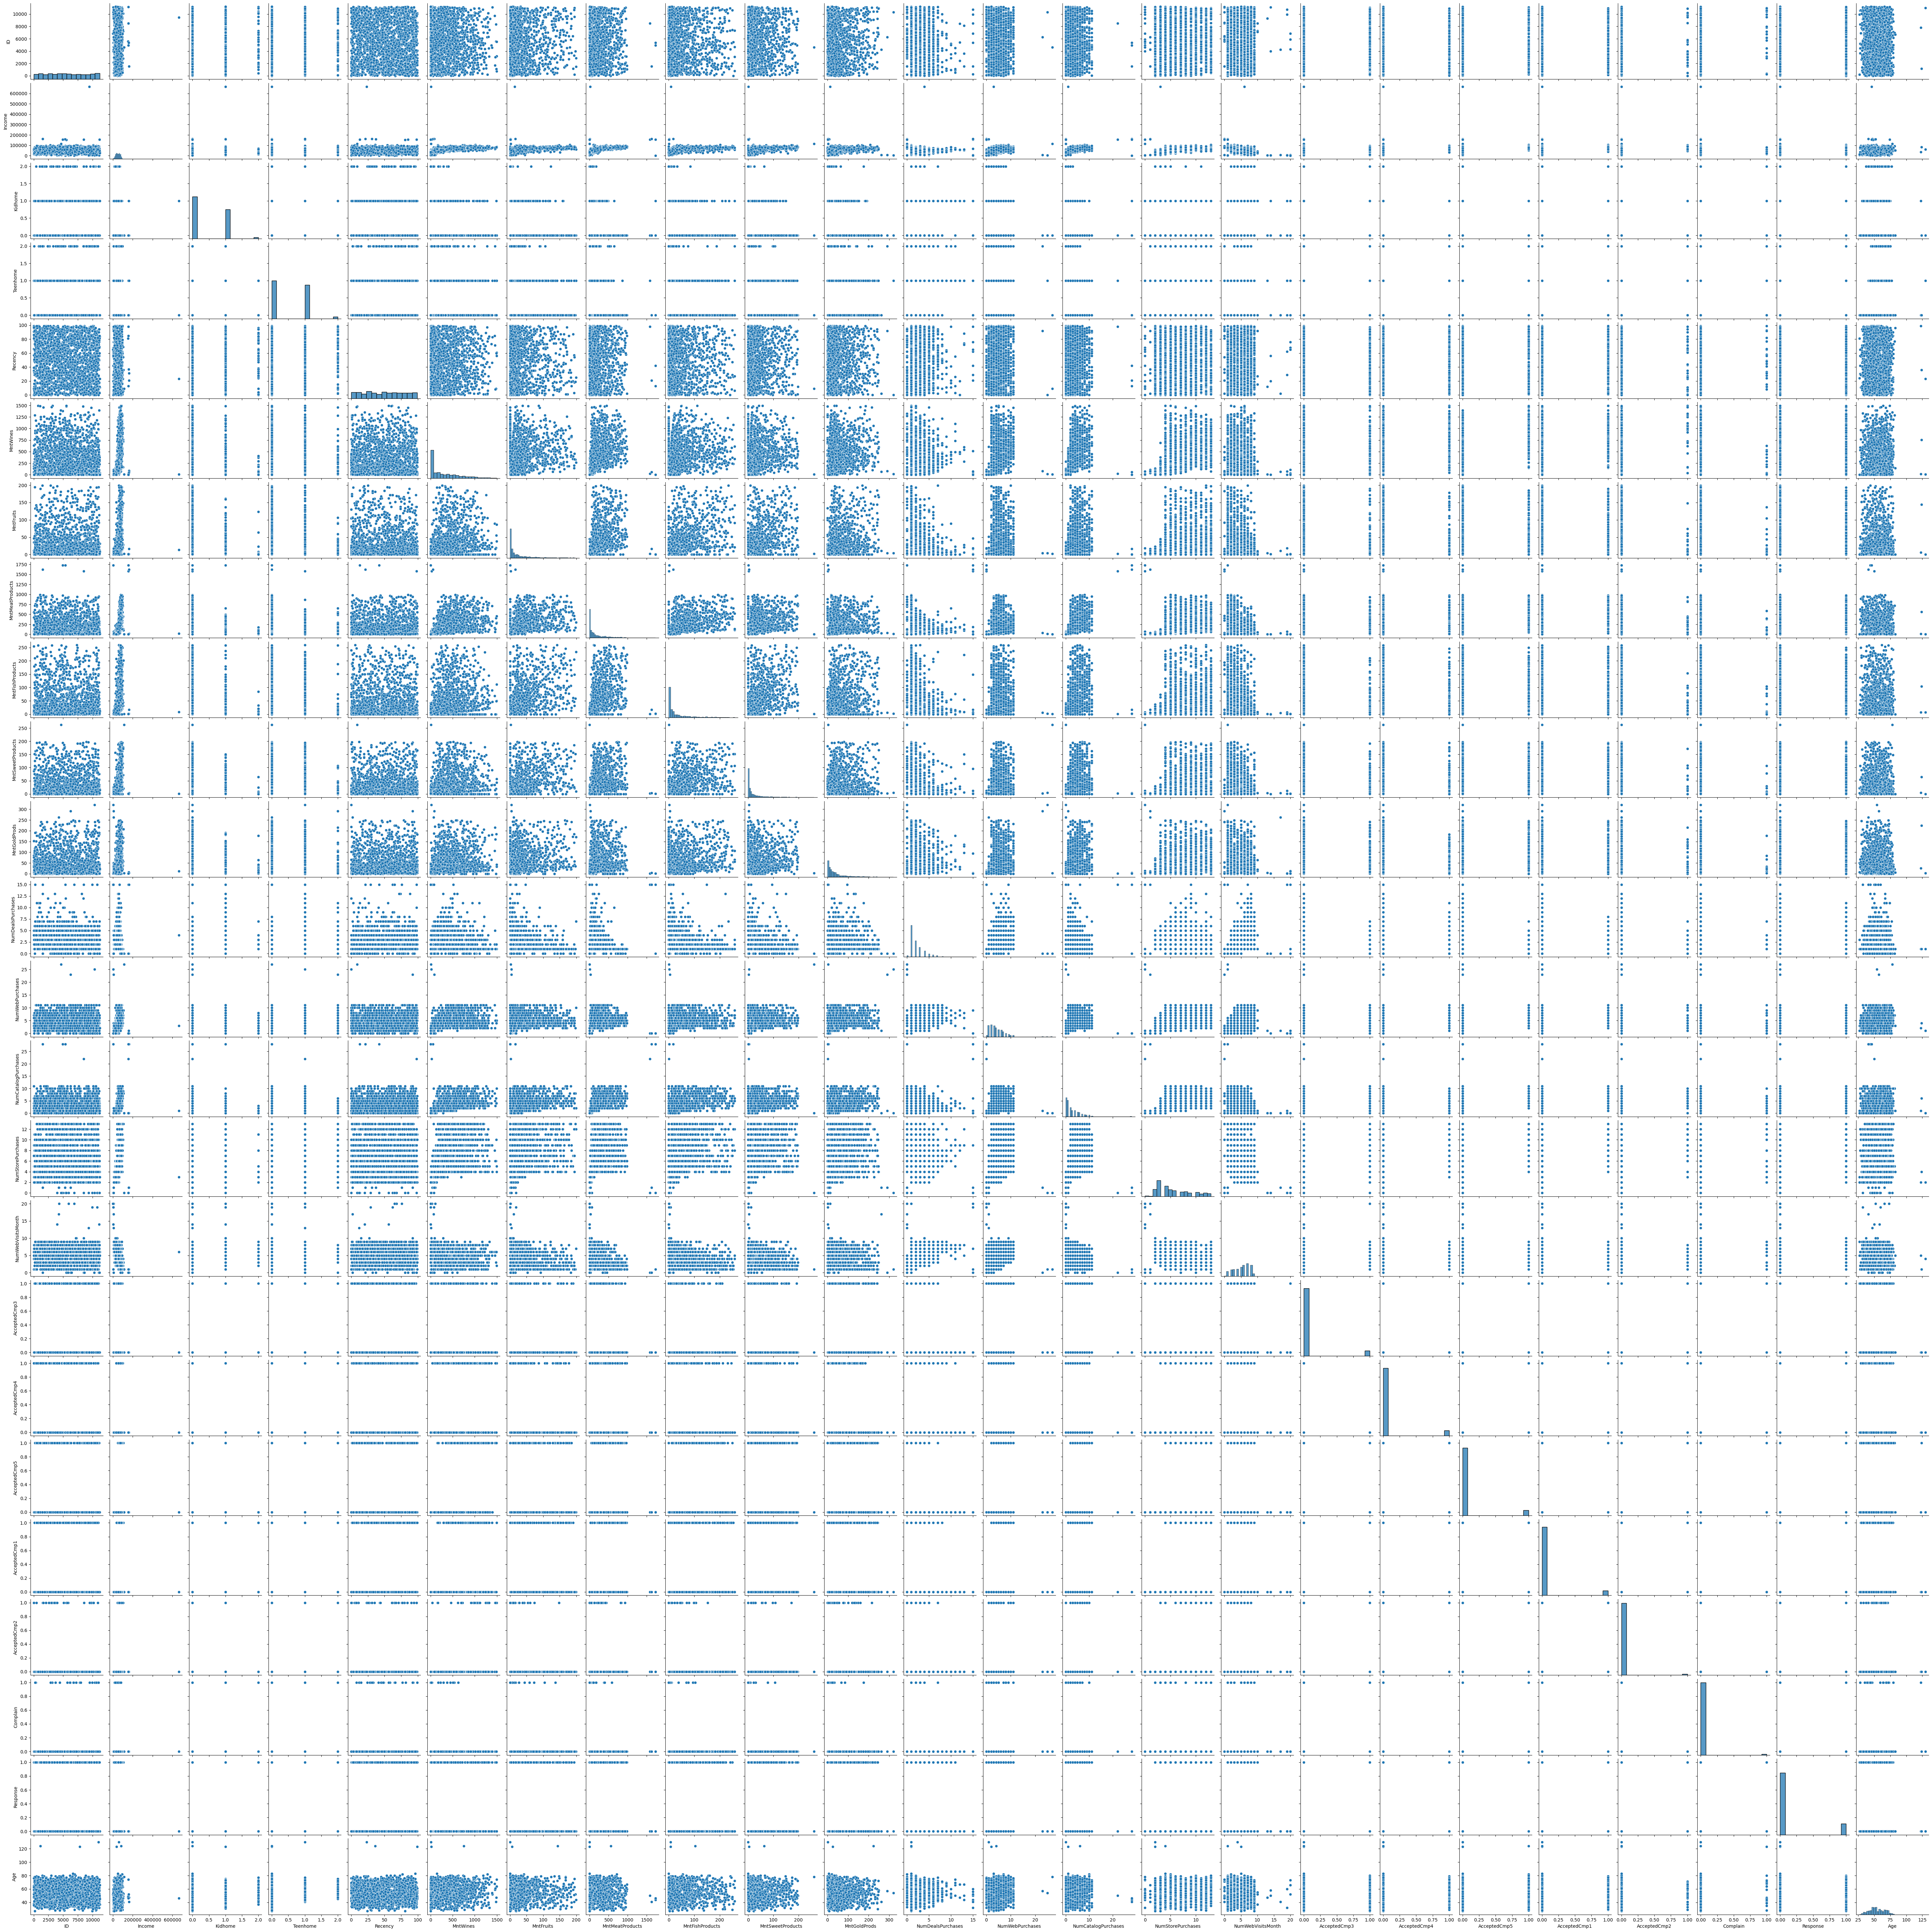

In [19]:
sns.pairplot(df)  
plt.show()

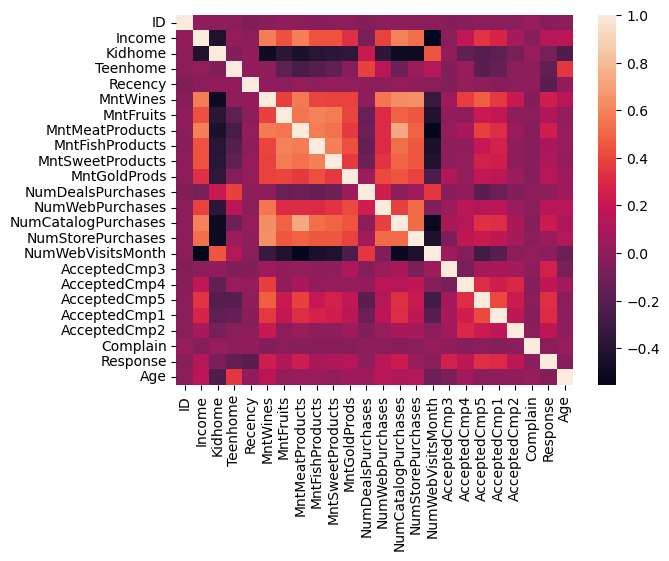

In [20]:
a = df.corr()
sns.heatmap(a)
plt.show()

In [23]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

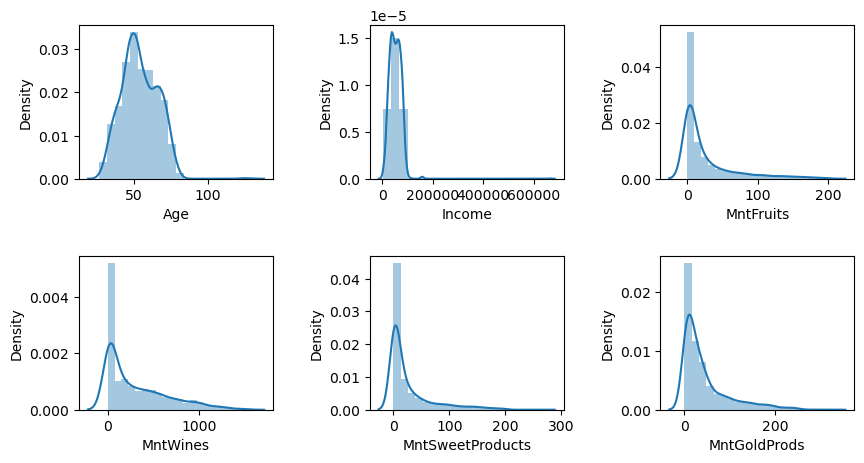

In [24]:
plt.figure(1 , figsize = (10 , 5))
n = 0 
for x in ['Age' , 'Income' , 'MntFruits', 'MntWines', 'MntSweetProducts','MntGoldProds']:
    n += 1
    plt.subplot(2 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
plt.show()

In [25]:
df['Income'].skew()

6.7634873728111184

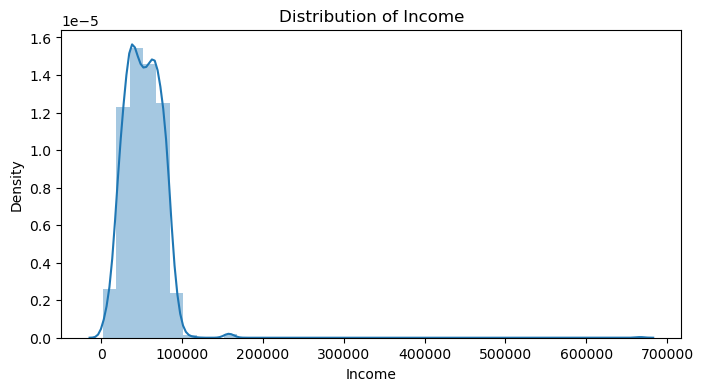

In [26]:
plt.figure(1 , figsize = (8 , 4))
plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
sns.distplot(df['Income'] , bins = 40)
plt.title('Distribution of Income')
plt.show() 

In [27]:
income = df['Income'].values
income.sort()
desc = income[::-1]
desc 


array([666666., 162397., 160803., ...,   3502.,   2447.,   1730.])

In [28]:
max_income = 600000  # set the threshold for income (max is 666666)
df = df[df['Income'] <= max_income]

In [29]:
df['Income'].skew()

0.3473496759140282

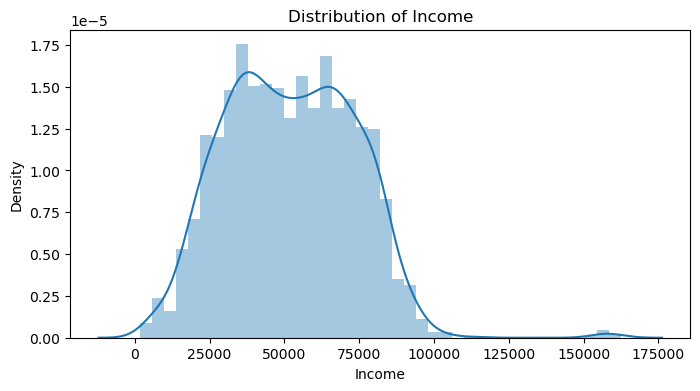

In [30]:
plt.figure(1 , figsize = (8 , 4))
plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
sns.distplot(df['Income'] , bins = 40)
plt.title('Distribution of Income')
plt.show()

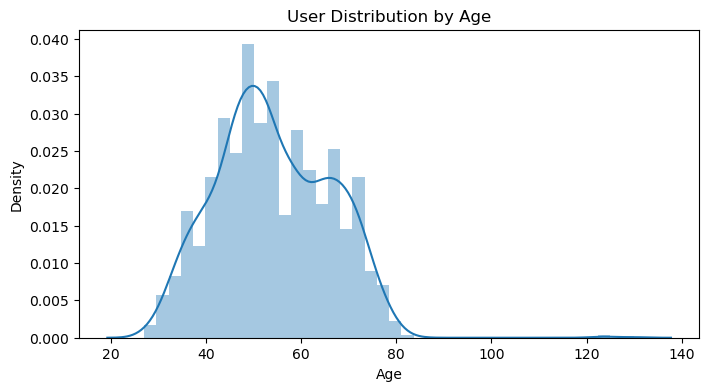

In [31]:
plt.figure(1 , figsize = (8 , 4))
plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
sns.distplot(df['Age'] , bins = 40)
plt.title('User Distribution by Age')
plt.show() 

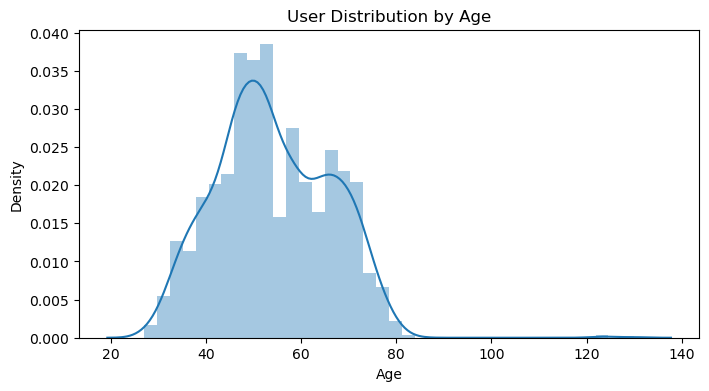

In [33]:
plt.figure(1 , figsize = (8 , 4))

sns.distplot(df['Age'])
plt.title('User Distribution by Age')
plt.show() 

In [34]:
income = df['Age'].values
income.sort()
desc = income[::-1]
desc[:5] 

array([130, 124, 123,  83,  82], dtype=int64)

In [35]:
max_age = 120  # set the threshold for income 
df = df[df['Age'] <= max_age]

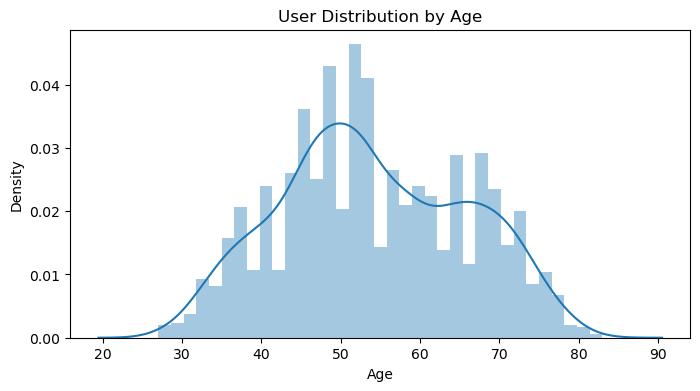

In [36]:
plt.figure(1 , figsize = (8 , 4))
plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
sns.distplot(df['Age'] , bins = 35)
plt.title('User Distribution by Age')
plt.show() 

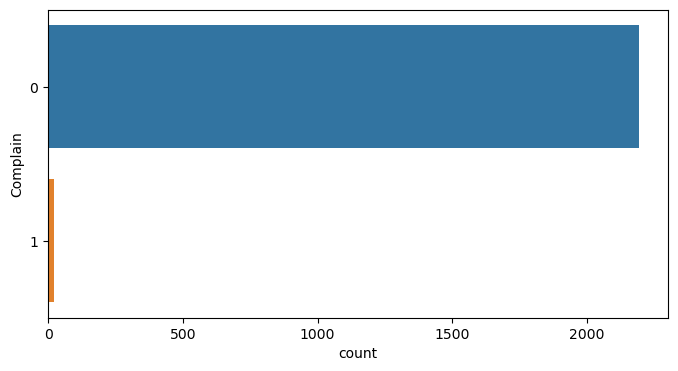

21

In [37]:
plt.figure(1 , figsize = (8 , 4))
sns.countplot(y = 'Complain' , data = df)
plt.show()

sum(df['Complain'])

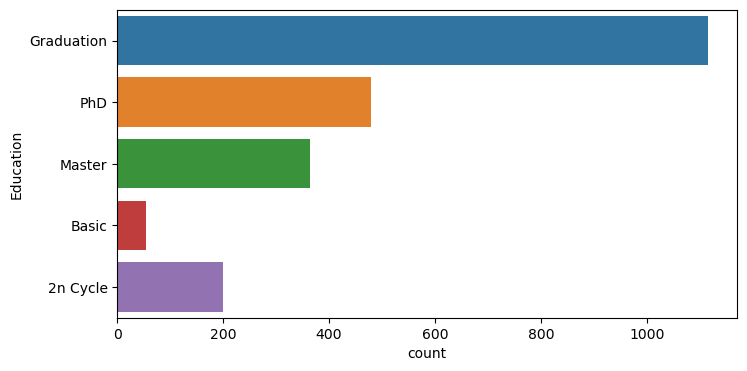

In [38]:
plt.figure(1 , figsize = (8, 4))
sns.countplot(y = 'Education' , data = df)
plt.show()

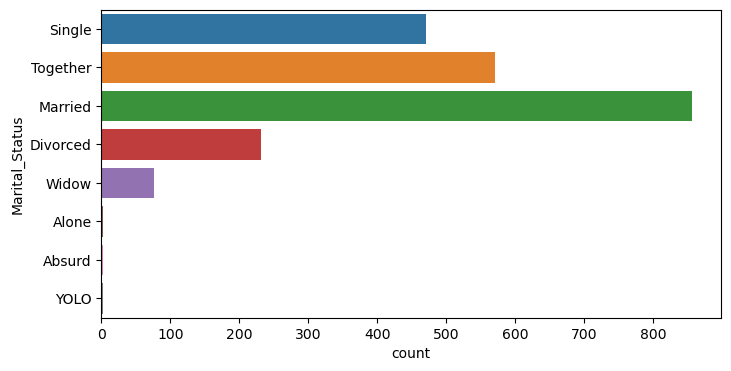

In [39]:
plt.figure(1 , figsize = (8 , 4))
sns.countplot(y = 'Marital_Status' , data = df)
plt.show()

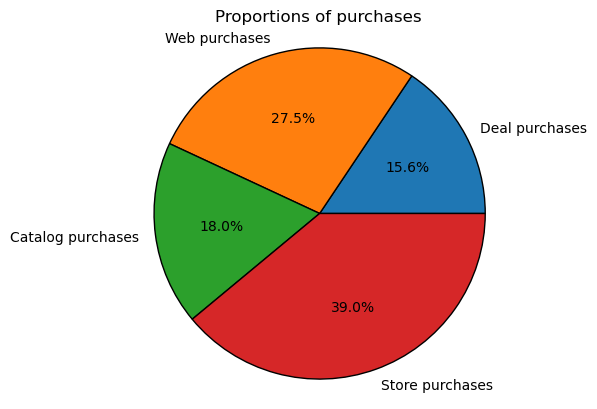

In [41]:
total_purchases =df['NumDealsPurchases'].sum()+ df['NumWebPurchases'].sum() + df['NumCatalogPurchases'].sum() + df['NumStorePurchases'].sum()

Deal=df['NumDealsPurchases'].sum()/ total_purchases
web = df['NumWebPurchases'].sum() / total_purchases
catalog = df['NumCatalogPurchases'].sum() / total_purchases
store = df['NumStorePurchases'].sum() / total_purchases



labels = ['Deal purchases','Web purchases', 'Catalog purchases', 'Store purchases']
proportions = [Deal,web, catalog, store]
plt.pie(proportions, labels=labels, autopct='%1.1f%%',
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Proportions of purchases')
plt.axis('equal')
plt.show()

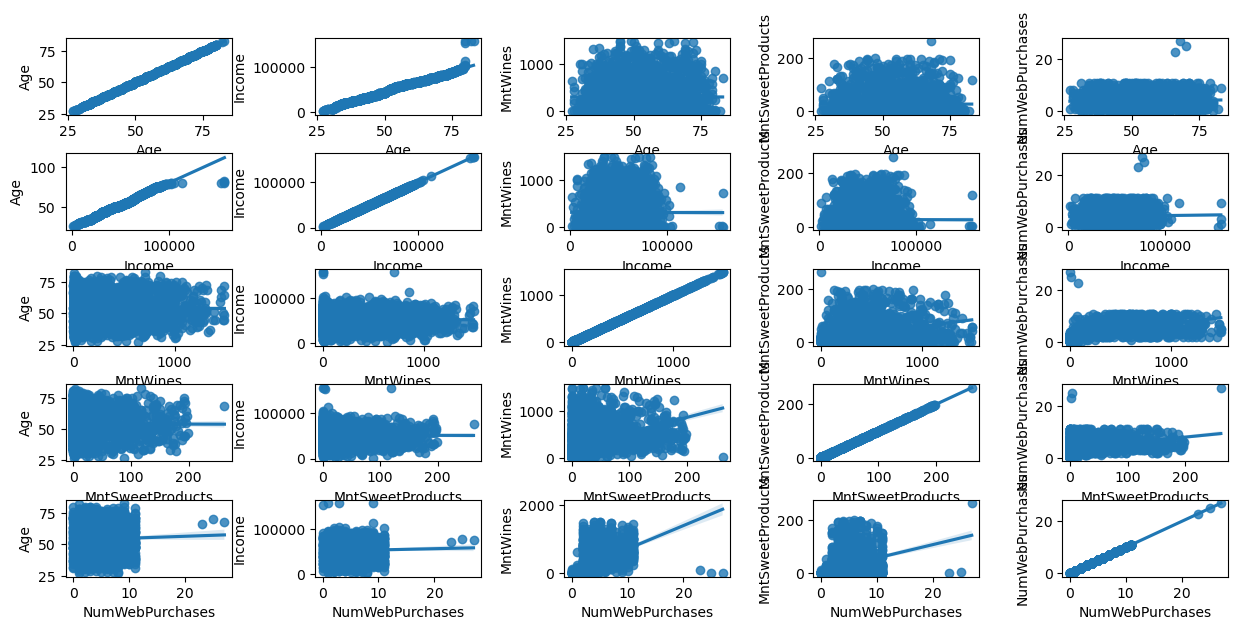

In [43]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in [    'Age' , 'Income' , 'MntWines', 'MntSweetProducts','NumWebPurchases']:
    for y in ['Age' , 'Income' , 'MntWines', 'MntSweetProducts','NumWebPurchases']:
        n += 1
        plt.subplot(5, 5, n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

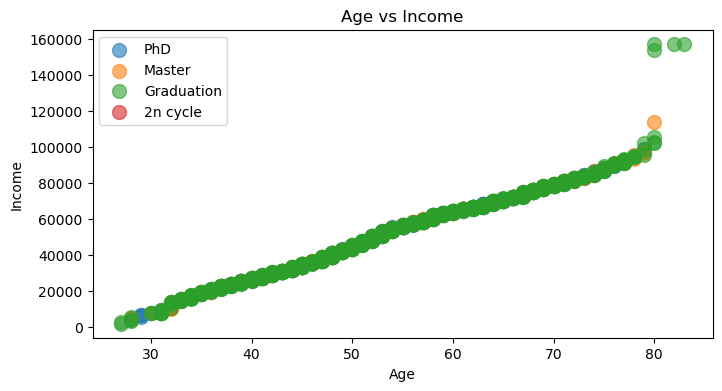

In [44]:
plt.figure(1 , figsize = (8 , 4))
for Education in ['PhD','Master','Graduation', '2n cycle']:
    plt.scatter(x = 'Age' , y = 'Income' , data = df[df['Education'] == Education] ,
                s = 100 , alpha = 0.6 , label = Education)
plt.xlabel('Age'), plt.ylabel('Income') 
plt.title('Age vs Income')
plt.legend()
plt.show()

In [47]:
cdf = df

In [48]:
def days_since(date_str):
    start_date = datetime.strptime(date_str, '%d-%m-%Y')
    current_date = datetime.today()
    return (current_date - start_date).days
cdf = pd.get_dummies(cdf, columns=['Education', 'Marital_Status'])


cdf.head()

ID  Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  5524  1730.0        0         0       58       635         88   
1  2174  2447.0        1         1       38        11          1   
2  4141  3502.0        0         0       26       426         49   
3  6182  4023.0        1         0       26        11          4   
4  5324  4428.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Education_Master  \
0              546              172                88  ...                 0   
1                6                2                 1  ...                 0   
2              127              111                21  ...                 0   
3               20               10                 3  ...                 0   
4              118               46                27  ...                 0   

   Education_PhD  Marital_Status_Absurd  Marital_Status_Alone  \
0              0                      0                     0   
1              0                      0                     0   
2              0                      0                     0   
3              0                      0                     0   
4              1                      0                     0   

   Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                        0                       0                      1   
1                        0                       0                      1   
2                        0                       0                      0   
3                        0                       0                      0   
4                        0                       1                      0   

   Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  
0                        0                     0                    0  
1                        0                     0                    0  
2                        1                     0                    0  
3                        1                     0                    0  
4                        0                     0                    0  

[5 rows x 37 columns]

In [49]:
scaler = StandardScaler()
cdf_norm = scaler.fit_transform(cdf)
X = scaler.fit_transform(cdf.values)

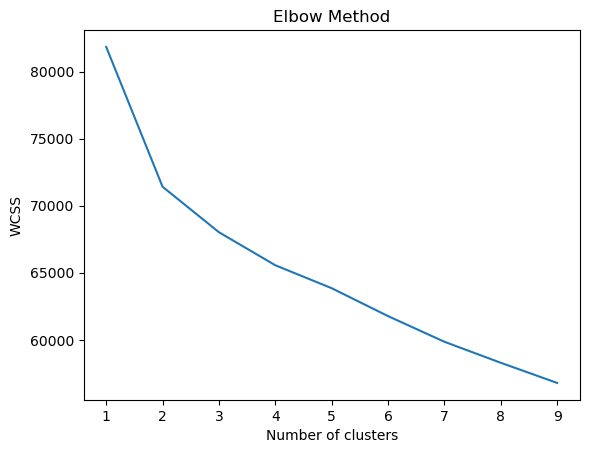

In [54]:
wcss = []

k = 10
for i in range(1, k):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, k), wcss)

plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

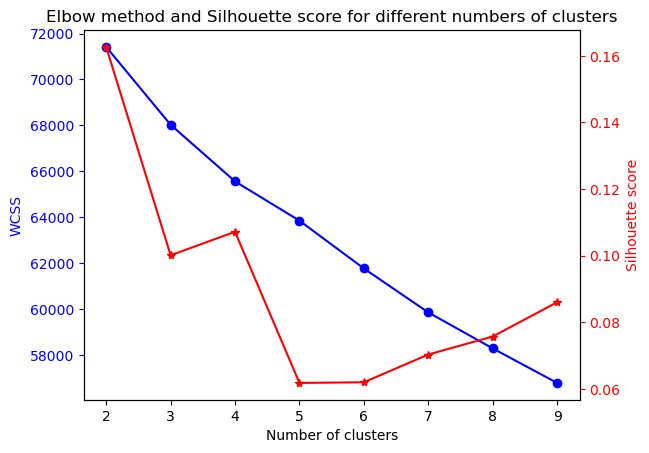

In [51]:
k_range = range(2, 10)


wcss_scores = []              
silhouette_scores = []


for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))


fig, ax1 = plt.subplots()
ax1.plot(k_range, wcss_scores, 'bo-')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('WCSS', color='blue')
ax1.tick_params('y', colors='blue')

ax2 = ax1.twinx()
ax2.plot(k_range, silhouette_scores, 'r*-')
ax2.set_ylabel('Silhouette score', color='red')
ax2.tick_params('y', colors='red')

plt.title('Elbow method and Silhouette score for different numbers of clusters')
plt.show()